In [1]:
%matplotlib inline
import pandas as pd


tripsDataFile = '../201402_Trips_WithBicycleDistanceSpeed.csv'

trips = pd.DataFrame.from_csv(tripsDataFile)
trips = trips[(trips['Duration'] <= 5400) & (trips['Duration'] > 60)]


/Users/p2723777/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2821: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


In [2]:

import datetime as datetime

def groupByHour(starttime):
    timestamp = datetime.datetime.strptime(starttime, '%m/%d/%Y %H:%M')
    year = timestamp.year
    month = timestamp.month
    day = timestamp.day
    hour = timestamp.hour
    return datetime.datetime(year, month, day, hour, 0)

In [3]:

trips['starthour']=trips['Start Date'].map(groupByHour)
tripStationHours=trips[['startStationId', 'starthour']].reset_index()

tripStationHourCounts = tripStationHours.groupby(['startStationId', 'starthour'])['Trip ID'].count().reset_index(name="startTripCount")
# tripStationHourCounts
topStationsByCounts=[70,50,60,77,55,69,61]
# topStationsByCounts

tripStationHourCounts['hour']=tripStationHourCounts['starthour'].map(lambda x: x.hour)


In [4]:

tripStationHourCounts.to_csv('./hourlyPatterns/201402_TopStationHourlyCounts.csv',index=False)


In [5]:
topStationsHourlyCountsFromFile = pd.DataFrame.from_csv('./hourlyPatterns/201402_TopStationHourlyCounts.csv')
topStationsHourlyCountsFromFile =topStationsHourlyCountsFromFile[topStationsHourlyCountsFromFile.apply(lambda x: x['hour'] == 12, axis=1)]


In [6]:

import datetime as datetime

topStationsHourlyCountsFromFile['starthour'] = pd.to_datetime(topStationsHourlyCountsFromFile['starthour'])
def mask(df, f):
  return df[f(df)]

# topStationsHourlyCountsFromFile.mask(lambda x: x['starthour'].weekday())


# topStationsHourlyCountsFromFile=topStationsHourlyCountsFromFile[topStationsHourlyCountsFromFile['starthour'].apply(lambda x: x.weekday())]
topStationsHourlyCountsFromFile
# topStationsHourlyCountsFromFile

# topStationsHourlyCountsFromFile[topStationsHourlyCountsFromFile.apply(lambda x: x['hour'] == 12)]
# # #  = topStationsHourlyCountsFromFile[(trips['starthour'].weekday())]

# topStationsHourlyCountsFromFile

,starthour,startTripCount,hour
startStationId,,,
2,2013-09-01 12:00:00,1,12
2,2013-09-03 12:00:00,2,12
2,2013-09-04 12:00:00,1,12
2,2013-09-07 12:00:00,2,12
2,2013-09-11 12:00:00,1,12
2,2013-09-12 12:00:00,1,12
2,2013-10-05 12:00:00,2,12
2,2013-10-11 12:00:00,1,12
2,2013-10-12 12:00:00,3,12


In [7]:
topStationsHourlyCountsFromFile=topStationsHourlyCountsFromFile.reset_index()
topStationHourlyCounts_at12=topStationsHourlyCountsFromFile.pivot(index='starthour', columns='startStationId', values='startTripCount')
topStationHourlyCounts_at12=topStationHourlyCounts_at12.fillna(0)
topStationHourlyCounts_at12

startStationId,2,3,4,5,6,7,8,9,10,11,...,70,71,72,73,74,75,76,77,80,82
starthour,,,,,,,,,,,,,,,,,,,,,
2013-08-29 12:00:00,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,1.0,2.0,...,0.0,1.0,5.0,2.0,3.0,2.0,5.0,6.0,0.0,0.0
2013-08-30 12:00:00,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,6.0,5.0,0.0,0.0
2013-08-31 12:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,5.0,3.0,2.0,5.0,1.0,2.0,4.0,0.0,0.0,0.0
2013-09-01 12:00:00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,6.0,1.0,1.0,0.0,2.0,4.0,0.0,0.0,0.0,0.0
2013-09-02 12:00:00,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,5.0,0.0,3.0,0.0,0.0,2.0,4.0,0.0,0.0,0.0
2013-09-03 12:00:00,2.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,1.0,1.0,0.0,4.0,0.0,0.0,3.0,0.0,0.0
2013-09-04 12:00:00,1.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,2.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0
2013-09-05 12:00:00,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,4.0,0.0,2.0,1.0,0.0,0.0
2013-09-06 12:00:00,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,0.0,...,3.0,0.0,2.0,0.0,0.0,0.0,3.0,6.0,0.0,0.0


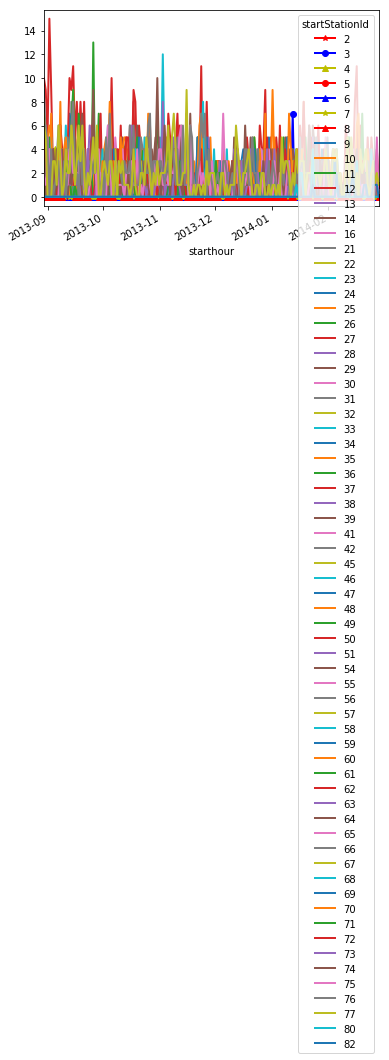

In [8]:

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# plot = topStationHourlyCounts.plot(x='starthour', kind='bar',title='topStationCountsOverTime')
# matplotlib.style.use('ggplot')
# plot=topStationHourlyCounts.plot()
# fig = plot.get_figure()
# fig.savefig("./hourlyPatterns/topStationCountsOverTime.png")

topStationHourlyCounts_at12.plot(style=['r*-','bo-','y^-','ro-','b^-','y*-','r^-'], linewidth=2.0, kind='line')